![pandas](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/2880px-Pandas_logo.svg.png)

# Objectives

- Load .csv files into `pandas` DataFrames
- Describe and manipulate data in Series and DataFrames

# What is Pandas?

![I have no idea what I'm doing panda](https://cdn-images-1.medium.com/max/1600/1*oBx032ncOwLmCFX3Epo3Zg.jpeg)

Just kidding - not actual literal pandas.

Pandas, as [the Anaconda docs](https://docs.anaconda.com/anaconda/packages/py3.7_osx-64/) tell us, offers us "High-performance, easy-to-use data structures and data analysis tools." It's something like "Excel for Python", but it's quite a bit more powerful. The name comes from "panel data", a common way to describe the kind of multidimensional data we'll be working with in certain academic circles (namely, statistics and econometrics) [[Source]](https://www.dlr.de/sc/Portaldata/15/Resources/dokumente/pyhpc2011/submissions/pyhpc2011_submission_9.pdf)

In order to use pandas, we'll need to import it into our notebook first.

In [83]:
# Import - using the common alias
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Accessing Data

![pandas documentation image showcasing the kinds of data it can both read and write to](https://pandas.pydata.org/docs/_images/02_io_readwrite.svg)

[[Image Source]](https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html)

Pandas can access a ton of different data types, including some that should be familiar: CSVs and JSONs! That's right, no more `with` / `open` statements now that we're using pandas!

Most of the time, we'll see CSVs - so let's access a 'toy' data set quickly just to familiarize ourselves with using pandas. There's a heart dataset available in the data folder on this repository - let's read that in.

In [2]:
# Use read_csv to read in the heart csv file
# Need to assign it to a variable too - let's call this heart_df
heart_df = pd.read_csv('data/heart.csv')

Find out more about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Heart%29).

The output of the `.read_csv()` function is a pandas *DataFrame*, which has a familiar tabaular structure of rows and columns.

In [3]:
# Let's check this variable out
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# What type is this variable?
type(heart_df)

pandas.core.frame.DataFrame

## DataFrames and Series

Two main types of pandas objects are the DataFrame and the Series, the latter being in effect a single column of the former:

In [5]:
# Let's grab just one column
age_series = heart_df['age']

Notice how we can isolate a column of our DataFrame simply by using square brackets together with the name of the column. We can also access columns as an attribute of the DataFrame - but that only works if the name of the column doesn't have any spaces or weird characters!

In [6]:
heart_df.age

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64

In [7]:
# What type is the column?
type(age_series)

pandas.core.series.Series

Both Series and DataFrames have an *index* as well:

In [8]:
heart_df.index

RangeIndex(start=0, stop=303, step=1)

In [9]:
age_series.index

RangeIndex(start=0, stop=303, step=1)

DataFrames have columns - but a Series is just a single column, so it doesn't have the columns attribute.

In [10]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
age_series.columns
# This will throw an error!

AttributeError: 'Series' object has no attribute 'columns'

Pandas is built on top of NumPy, and we can always access the NumPy array underlying a DataFrame using `.values`.

In [12]:
heart_df.values

array([[63.,  1.,  3., ...,  0.,  1.,  1.],
       [37.,  1.,  2., ...,  0.,  2.,  1.],
       [41.,  0.,  1., ...,  0.,  2.,  1.],
       ...,
       [68.,  1.,  0., ...,  2.,  3.,  0.],
       [57.,  1.,  0., ...,  1.,  3.,  0.],
       [57.,  0.,  1., ...,  1.,  2.,  0.]])

## Basic DataFrame Attributes and Methods

### `.head()` : first 5 rows

In [13]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### `.tail()` : last 5 rows

In [14]:
heart_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### `.info()` : information about the columns, including about nulls in those columns

In [15]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### `.describe()` : statistics about the data

In [16]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### `.dtypes` : data types of each column

In [17]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### `.shape` : number of rows and columns

In [18]:
heart_df.shape

(303, 14)

### Statistics

We saw them above, in the `.describe`, but we can also calculate statistics by calling them individually.

In [19]:
# Calculate the mean - for the whole dataframe!
heart_df.mean()

age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
dtype: float64

In [20]:
# Now min
heart_df.min()

age          29.0
sex           0.0
cp            0.0
trestbps     94.0
chol        126.0
fbs           0.0
restecg       0.0
thalach      71.0
exang         0.0
oldpeak       0.0
slope         0.0
ca            0.0
thal          0.0
target        0.0
dtype: float64

In [21]:
# And max
heart_df.max()

age          77.0
sex           1.0
cp            3.0
trestbps    200.0
chol        564.0
fbs           1.0
restecg       2.0
thalach     202.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            4.0
thal          3.0
target        1.0
dtype: float64

## Enough With The Small Stuff - Bring On Real Data!

Let's access an open data portal and get some real live data!

Austin Animal Center Intake Data: https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm/

In [22]:
# Accessing a CSV from a url
intakes_url = pd.read_csv('https://data.austintexas.gov/resource/wter-evkm.csv')
intakes_url.head()

,animal_id,name,datetime,datetime2,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color
0,A665644,NaN,2013-10-21T07:59:00.000,2013-10-21T07:59:00.000,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
1,A665739,*Alana,2013-10-22T11:11:00.000,2013-10-22T11:11:00.000,Austin (TX),Stray,Normal,Cat,Intact Female,1 month,Domestic Medium Hair Mix,Black
2,A665763,NaN,2013-10-22T15:10:00.000,2013-10-22T15:10:00.000,E Riverside Dr/Royal Crest Dr in Austin (TX),Stray,Normal,Dog,Intact Male,4 months,Cairn Terrier Mix,Tan/White
3,A379998,Disciple,2013-10-23T11:42:00.000,2013-10-23T11:42:00.000,51St And Grover in Austin (TX),Stray,Normal,Dog,Intact Male,10 years,Pit Bull,Black
4,A634503,Otter,2013-10-01T14:49:00.000,2013-10-01T14:49:00.000,Manor (TX),Owner Surrender,Normal,Dog,Spayed Female,2 years,Norfolk Terrier Mix,Tan


In [23]:
# Same as the JSON output from this API endpoint, but different levels of detail for dates!
pd.read_json('https://data.austintexas.gov/resource/wter-evkm.json').head()

,animal_id,datetime,datetime2,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,name
0,A665644,2013-10-21 07:59:00,2013-10-21T07:59:00.000,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,NaN
1,A665739,2013-10-22 11:11:00,2013-10-22T11:11:00.000,Austin (TX),Stray,Normal,Cat,Intact Female,1 month,Domestic Medium Hair Mix,Black,*Alana
2,A665763,2013-10-22 15:10:00,2013-10-22T15:10:00.000,E Riverside Dr/Royal Crest Dr in Austin (TX),Stray,Normal,Dog,Intact Male,4 months,Cairn Terrier Mix,Tan/White,NaN
3,A379998,2013-10-23 11:42:00,2013-10-23T11:42:00.000,51St And Grover in Austin (TX),Stray,Normal,Dog,Intact Male,10 years,Pit Bull,Black,Disciple
4,A634503,2013-10-01 14:49:00,2013-10-01T14:49:00.000,Manor (TX),Owner Surrender,Normal,Dog,Spayed Female,2 years,Norfolk Terrier Mix,Tan,Otter


In [24]:
# But this is only 1000 rows... website says there's 136K rows!
intakes_url.shape

(1000, 12)

In [25]:
# It's a limitation of the API - let's just download the data instead
# It's in the data folder
df = pd.read_csv('data/Austin_Animal_Center_Intakes-clean-year.csv')

In [26]:
# Now let's explore those earlier attributes and methods on this dataset!
# Check the first 5 rows
df.head()

,Animal ID,Name,DateTime,Year,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,2019-01-03 16:19:00,2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,2015-07-05 12:59:00,2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,2016-04-14 18:43:00,2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,2013-10-21 07:59:00,2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,2014-06-29 10:38:00,2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [27]:
# Check the last 5 rows
df.tail()

,Animal ID,Name,DateTime,Year,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
136758,A852238,A852238,2022-02-28 14:02:00,2022,Cameron And Crosspark Drive in Austin (TX),Stray,Normal,Dog,Intact Female,6 months,Labrador Retriever Mix,Black/White
136759,A852221,Coco,2022-02-28 11:05:00,2022,45 And 183 in Travis (TX),Stray,Normal,Dog,Intact Male,3 years,Great Pyrenees,White
136760,A851977,*Jack,2022-02-22 13:34:00,2022,1200 Montopolis Drive in Austin (TX),Stray,Normal,Dog,Intact Male,2 years,Chihuahua Shorthair/Dachshund,Black/White
136761,A852127,Sonic,2022-02-25 13:05:00,2022,7601 Daffan Ln Unit 424 in Austin (TX),Stray,Normal,Dog,Intact Male,2 years,Pit Bull Mix,White/Yellow
136762,A852194,Queen,2022-02-27 13:44:00,2022,8071 N Lamar Blvd in Austin (TX),Stray,Normal,Dog,Intact Female,4 months,Cane Corso,Blue Cream


In [28]:
# Check the shape
df.shape

(136763, 12)

In [29]:
# Check the datatypes
df.dtypes

Animal ID           object
Name                object
DateTime            object
Year                 int64
Found Location      object
Intake Type         object
Intake Condition    object
Animal Type         object
Sex upon Intake     object
Age upon Intake     object
Breed               object
Color               object
dtype: object

In [30]:
# Check more general information on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136763 entries, 0 to 136762
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         136763 non-null  object
 1   Name              95772 non-null   object
 2   DateTime          136763 non-null  object
 3   Year              136763 non-null  int64 
 4   Found Location    136763 non-null  object
 5   Intake Type       136763 non-null  object
 6   Intake Condition  136763 non-null  object
 7   Animal Type       136763 non-null  object
 8   Sex upon Intake   136762 non-null  object
 9   Age upon Intake   136763 non-null  object
 10  Breed             136763 non-null  object
 11  Color             136763 non-null  object
dtypes: int64(1), object(11)
memory usage: 12.5+ MB


In [31]:
# Check summary/descriptive statistics on the dataframe
df.describe()

,Year
count,136763.000000
mean,2017.100692
std,2.328994
min,2013.000000
25%,2015.000000
50%,2017.000000
75%,2019.000000
max,2022.000000


#### Any Observations?

- Just shows the 'Year' column - it's the only numeric column!

In [32]:
# We can run describe on just the string columns! Gives a different kind of output
df.describe(include=[object])

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
count,136763,95772,136763,136763,136763,136763,136763,136762,136763,136763,136763
unique,122244,23058,96160,57763,6,15,5,5,53,2734,614
top,A721033,Max,2016-09-23 12:00:00,Austin (TX),Stray,Normal,Dog,Intact Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,620,64,25674,94180,117867,77098,44962,23422,32034,14291


#### Any Observations?

- Can see non-null counts, number of uniques, plus the most frequent and how frequent it is
- Showcases the different kind of useful data you can explore when it's object vs numeric columns

## Adding to a DataFrame

### Adding Rows

We have a new animal coming in, captured here in a Python dictionary:

In [33]:
# Dictionary, where keys match the column names and values are the row values
# Note that the values are list-like - you could easily add more rows by adding to the lists!
next_row = {
    'Animal ID': ['A851755'],
    'Name': ["T'Challa"],
    'DateTime': ['2/28/2022 11:25:00 AM'],
    'Year': [2022],
    'Found Location': ['Houston (TX)'],
    'Intake Type': ['Public Assist'],
    'Intake Condition': ['Normal'],
    'Animal Type': ['Cat'],
    'Sex upon Intake': ['Neutered Male'],
    'Age upon Intake': ['4 years'],
    'Breed': ['Domestic Shorthair'],
    'Color': ['Black']
}
next_row

{'Animal ID': ['A851755'],
 'Name': ["T'Challa"],
 'DateTime': ['2/28/2022 11:25:00 AM'],
 'Year': [2022],
 'Found Location': ['Houston (TX)'],
 'Intake Type': ['Public Assist'],
 'Intake Condition': ['Normal'],
 'Animal Type': ['Cat'],
 'Sex upon Intake': ['Neutered Male'],
 'Age upon Intake': ['4 years'],
 'Breed': ['Domestic Shorthair'],
 'Color': ['Black']}

How can we add this to the bottom of our dataset?

In [34]:
# Let's first turn this into a DataFrame.
# We can use the .from_dict() method.

new_animal = pd.DataFrame.from_dict(next_row)
new_animal

,Animal ID,Name,DateTime,Year,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A851755,T'Challa,2/28/2022 11:25:00 AM,2022,Houston (TX),Public Assist,Normal,Cat,Neutered Male,4 years,Domestic Shorthair,Black


In [36]:
# Now we just need to concatenate the two DataFrames together.
# Note the `ignore_index` parameter! We'll set that to True.

df_augmented = pd.concat([df, new_animal],
                         ignore_index=True)

In [37]:
# Let's check the end to make sure we were successful!
df_augmented.tail()

,Animal ID,Name,DateTime,Year,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
136759,A852221,Coco,2022-02-28 11:05:00,2022,45 And 183 in Travis (TX),Stray,Normal,Dog,Intact Male,3 years,Great Pyrenees,White
136760,A851977,*Jack,2022-02-22 13:34:00,2022,1200 Montopolis Drive in Austin (TX),Stray,Normal,Dog,Intact Male,2 years,Chihuahua Shorthair/Dachshund,Black/White
136761,A852127,Sonic,2022-02-25 13:05:00,2022,7601 Daffan Ln Unit 424 in Austin (TX),Stray,Normal,Dog,Intact Male,2 years,Pit Bull Mix,White/Yellow
136762,A852194,Queen,2022-02-27 13:44:00,2022,8071 N Lamar Blvd in Austin (TX),Stray,Normal,Dog,Intact Female,4 months,Cane Corso,Blue Cream
136763,A851755,T'Challa,2/28/2022 11:25:00 AM,2022,Houston (TX),Public Assist,Normal,Cat,Neutered Male,4 years,Domestic Shorthair,Black


### Adding (and Deleting) Columns

Adding a column is very easy in `pandas`. Let's add a new column to our dataset called "test", and set all of its values to 0.

In [38]:
# Create a new column, 'test', where every value in the col is 0
df_augmented['test'] = 0

In [39]:
# Sanity check
df_augmented.head()

,Animal ID,Name,DateTime,Year,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,test
0,A786884,*Brock,2019-01-03 16:19:00,2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,0
1,A706918,Belle,2015-07-05 12:59:00,2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,0
2,A724273,Runster,2016-04-14 18:43:00,2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,0
3,A665644,NaN,2013-10-21 07:59:00,2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,0
4,A682524,Rio,2014-06-29 10:38:00,2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,0


But we don't need that - let's drop that column.

In [40]:
# Drop that test column
df_augmented = df_augmented.drop(columns=['test'])

In [41]:
# Sanity check
df_augmented.head()

,Animal ID,Name,DateTime,Year,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,2019-01-03 16:19:00,2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,2015-07-05 12:59:00,2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,2016-04-14 18:43:00,2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,2013-10-21 07:59:00,2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,2014-06-29 10:38:00,2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


We can also do math with columns, or use mathematical notation to combine columns even when they aren't numerical!

We don't have any numeric data in this current dataset. But we can still create a combined "Type" column that combines the values of our Intake Type and Animal Type columns.

In [42]:
# Create a new column, 'Type', from the two 'Type' columns
df_augmented['Type'] = df_augmented['Intake Type'] + " " + df_augmented['Animal Type']

In [43]:
# Sanity check
df_augmented.head()

,Animal ID,Name,DateTime,Year,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Type
0,A786884,*Brock,2019-01-03 16:19:00,2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,Stray Dog
1,A706918,Belle,2015-07-05 12:59:00,2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,Stray Dog
2,A724273,Runster,2016-04-14 18:43:00,2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,Stray Dog
3,A665644,NaN,2013-10-21 07:59:00,2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,Stray Cat
4,A682524,Rio,2014-06-29 10:38:00,2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,Stray Dog


## Filtering

We can use filtering techniques to see only certain rows of our data. Let's look at only animals taken into the center during or after 2020:

In [44]:
# Check which rows have an intake year greater than or equal to 2020
df_augmented['Year'] >= 2020

0         False
1         False
2         False
3         False
4         False
          ...  
136759     True
136760     True
136761     True
136762     True
136763     True
Name: Year, Length: 136764, dtype: bool

In [45]:
# Let's explore an interesting property of boolean columns...
# Find out the total sum of animals taken in during or after 2020
sum(df_augmented['Year'] >= 2020)

23270

But this only gives us True/False outputs... what if we want to really filter?

### `.loc` 

We can locate and segment down to only rows where some condition is true using `.loc`. This takes in a condition, and only outputs the rows where that condition is True! 

> **Note:** locate (`.loc`) uses square brackets, not parentheses! Often, square brackets denote location-focused actions, like this one.

Let's try this first with the condition we just built, and locate all animals taken in during or after 2020.

In [46]:
# Create a subset dataframe of animals taken in during or after 2020
subset_2020 = df_augmented.loc[df_augmented['Year'] >= 2020]

In [47]:
subset_2020.head()

,Animal ID,Name,DateTime,Year,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Type
7,A844350,*Ella,2021-10-15 11:40:00,2021,2112 East William Cannon Drive in Austin (TX),Stray,Normal,Cat,Intact Female,6 months,Domestic Shorthair,Brown Tabby,Stray Cat
9,A818975,NaN,2020-06-18 14:53:00,2020,Braker Lane And Metric in Travis (TX),Stray,Normal,Cat,Intact Male,4 weeks,Domestic Shorthair,Cream Tabby,Stray Cat
22,A831808,NaN,2021-04-02 11:16:00,2021,Austin (TX),Owner Surrender,Normal,Cat,Intact Female,1 month,Domestic Shorthair Mix,Tortie,Owner Surrender Cat
24,A836850,NaN,2021-06-15 12:37:00,2021,6111 Softwood Drive in Austin (TX),Public Assist,Pregnant,Dog,Intact Female,4 years,Pit Bull,Blue/White,Public Assist Dog
26,A815227,Baby,2020-03-12 13:52:00,2020,12305 Zeller Lane in Austin (TX),Stray,Normal,Dog,Intact Female,1 month,Norfolk Terrier,Brown/Cream,Stray Dog


We can return only certain columns when we do this, by adding an argument after the condition:

In [48]:
# Let's return just the 'Animal ID', 'DateTime' and 'Type' columns
df_augmented.loc[df_augmented['Year'] >= 2020, ['Animal ID', 'DateTime', 'Type']]

,Animal ID,DateTime,Type
7,A844350,2021-10-15 11:40:00,Stray Cat
9,A818975,2020-06-18 14:53:00,Stray Cat
22,A831808,2021-04-02 11:16:00,Owner Surrender Cat
24,A836850,2021-06-15 12:37:00,Public Assist Dog
26,A815227,2020-03-12 13:52:00,Stray Dog
...,...,...,...
136759,A852221,2022-02-28 11:05:00,Stray Dog
136760,A851977,2022-02-22 13:34:00,Stray Dog
136761,A852127,2022-02-25 13:05:00,Stray Dog
136762,A852194,2022-02-27 13:44:00,Stray Dog


What if I want to segment using multiple conditions? Use `&` for "and" and `|` for "or" - and use parentheses around individual conditions!

In [49]:
# Find all the Stray Cats taken in during or after 2020
df_augmented.loc[(df_augmented['Year'] >= 2020) & (df_augmented['Type'] == 'Stray Cat')]

,Animal ID,Name,DateTime,Year,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Type
7,A844350,*Ella,2021-10-15 11:40:00,2021,2112 East William Cannon Drive in Austin (TX),Stray,Normal,Cat,Intact Female,6 months,Domestic Shorthair,Brown Tabby,Stray Cat
9,A818975,NaN,2020-06-18 14:53:00,2020,Braker Lane And Metric in Travis (TX),Stray,Normal,Cat,Intact Male,4 weeks,Domestic Shorthair,Cream Tabby,Stray Cat
44,A821389,*Dim Sum,2020-08-10 14:10:00,2020,7800 San Felipe Boulevard in Austin (TX),Stray,Normal,Cat,Intact Male,4 weeks,Domestic Shorthair,Brown Tabby,Stray Cat
123,A816185,NaN,2020-04-09 07:49:00,2020,1830 W Rundberg in Austin (TX),Stray,Normal,Cat,Intact Male,1 week,Domestic Shorthair,Gray Tabby,Stray Cat
128,A834412,Montie,2021-05-13 13:58:00,2021,1601 East Slaughter Lane in Austin (TX),Stray,Sick,Cat,Neutered Male,5 years,Domestic Shorthair,Brown Tabby,Stray Cat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136734,A852021,*Luna,2022-02-23 11:57:00,2022,Austin (TX),Stray,Normal,Cat,Intact Female,3 months,Domestic Shorthair Mix,Brown Tabby,Stray Cat
136746,A850166,Rainey,2022-01-19 12:39:00,2022,South First in Austin (TX),Stray,Normal,Cat,Intact Male,1 month,Siamese,Seal Point,Stray Cat
136750,A852230,NaN,2022-02-28 12:15:00,2022,Austin (TX),Stray,Normal,Cat,Unknown,5 months,Domestic Shorthair,Brown Tabby,Stray Cat
136754,A852234,NaN,2022-02-28 12:33:00,2022,305 E Lola Lane in Austin (TX),Stray,Injured,Cat,Intact Female,2 years,Domestic Shorthair,Calico,Stray Cat


## Your turn!

### Exercise 1

You need to find dogs that need extra attention - How would you find all dogs where the intake condition is NOT normal?

In [50]:
df_augmented.loc[(df_augmented['Animal Type'] == 'Dog') & (df_augmented['Intake Condition'] != 'Normal')]

,Animal ID,Name,DateTime,Year,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Type
24,A836850,NaN,2021-06-15 12:37:00,2021,6111 Softwood Drive in Austin (TX),Public Assist,Pregnant,Dog,Intact Female,4 years,Pit Bull,Blue/White,Public Assist Dog
38,A794334,Pearl,2019-09-02 11:52:00,2019,Outside Jurisdiction,Owner Surrender,Sick,Dog,Spayed Female,3 years,Boxer Mix,White,Owner Surrender Dog
40,A732903,*Raven,2016-08-14 15:02:00,2016,Austin (TX),Stray,Injured,Dog,Intact Female,2 months,Labrador Retriever Mix,Black/White,Stray Dog
91,A683884,Blackie,2014-07-16 15:52:00,2014,7619 E Ben White Blvd in Austin (TX),Stray,Injured,Dog,Neutered Male,2 years,German Shepherd Mix,Black/Tan,Stray Dog
134,A818382,Cookie,2020-06-08 08:35:00,2020,4434 Frontier Trail in Austin (TX),Owner Surrender,Sick,Dog,Intact Male,1 month,Boxer,Brown/Black,Owner Surrender Dog
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136723,A852080,*Marshmallow Fluff,2022-02-24 13:29:00,2022,6911 Bennett Ave in Austin (TX),Stray,Injured,Dog,Intact Female,10 months,German Shepherd Mix,Buff/Tan,Stray Dog
136724,A852083,*Honey,2022-02-24 13:29:00,2022,6911 Bennett Ave in Austin (TX),Stray,Injured,Dog,Intact Female,2 months,Labrador Retriever Mix,Black/White,Stray Dog
136726,A852085,*Treacle,2022-02-24 13:29:00,2022,6911 Bennett Ave in Austin (TX),Stray,Injured,Dog,Intact Female,2 months,Labrador Retriever,Brown/White,Stray Dog
136728,A852084,*Maple Syrup,2022-02-24 13:29:00,2022,6911 Bennett Ave in Austin (TX),Stray,Injured,Dog,Intact Female,2 months,Labrador Retriever Mix,Black/White,Stray Dog


<details>
    <summary>Answer</summary>

```python
df_augmented.loc[(df_augmented['Animal Type'] == 'Dog') & (df_augmented['Intake Condition'] != 'Normal')]
```
</details>

### Exercise 2

You need to find animals that might need to be fixed - How would you find all animals that are either Intact Male or Intact Female?

In [51]:
df_augmented.loc[(df_augmented['Sex upon Intake'] == 'Intact Male') | 
                 (df_augmented['Sex upon Intake'] == 'Intact Female')]

,Animal ID,Name,DateTime,Year,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Type
2,A724273,Runster,2016-04-14 18:43:00,2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,Stray Dog
3,A665644,NaN,2013-10-21 07:59:00,2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,Stray Cat
7,A844350,*Ella,2021-10-15 11:40:00,2021,2112 East William Cannon Drive in Austin (TX),Stray,Normal,Cat,Intact Female,6 months,Domestic Shorthair,Brown Tabby,Stray Cat
8,A708452,Mumble,2015-07-30 14:37:00,2015,Austin (TX),Public Assist,Normal,Dog,Intact Male,2 years,Labrador Retriever Mix,Black/White,Public Assist Dog
9,A818975,NaN,2020-06-18 14:53:00,2020,Braker Lane And Metric in Travis (TX),Stray,Normal,Cat,Intact Male,4 weeks,Domestic Shorthair,Cream Tabby,Stray Cat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136758,A852238,A852238,2022-02-28 14:02:00,2022,Cameron And Crosspark Drive in Austin (TX),Stray,Normal,Dog,Intact Female,6 months,Labrador Retriever Mix,Black/White,Stray Dog
136759,A852221,Coco,2022-02-28 11:05:00,2022,45 And 183 in Travis (TX),Stray,Normal,Dog,Intact Male,3 years,Great Pyrenees,White,Stray Dog
136760,A851977,*Jack,2022-02-22 13:34:00,2022,1200 Montopolis Drive in Austin (TX),Stray,Normal,Dog,Intact Male,2 years,Chihuahua Shorthair/Dachshund,Black/White,Stray Dog
136761,A852127,Sonic,2022-02-25 13:05:00,2022,7601 Daffan Ln Unit 424 in Austin (TX),Stray,Normal,Dog,Intact Male,2 years,Pit Bull Mix,White/Yellow,Stray Dog


<details>
    <summary>Answer</summary>

```python
df_augmented[(df_augmented['Sex upon Intake'] == 'Intact Male') |
             (df_augmented['Sex upon Intake'] == 'Intact Female')]
```
</details>

### `.iloc`

`.iloc` is used for integer-location based indexing, aka locate by number. It can take in lists of numbers, python slices, or specific numbers - but sometimes it can be a bit tricky!

In [52]:
# Find the first 3 rows
df_augmented.iloc[:3]

,Animal ID,Name,DateTime,Year,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Type
0,A786884,*Brock,2019-01-03 16:19:00,2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,Stray Dog
1,A706918,Belle,2015-07-05 12:59:00,2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,Stray Dog
2,A724273,Runster,2016-04-14 18:43:00,2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,Stray Dog


In [53]:
# Same as using head(3)
df_augmented.head(3)

,Animal ID,Name,DateTime,Year,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Type
0,A786884,*Brock,2019-01-03 16:19:00,2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,Stray Dog
1,A706918,Belle,2015-07-05 12:59:00,2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,Stray Dog
2,A724273,Runster,2016-04-14 18:43:00,2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,Stray Dog


In [54]:
# Can look exactly where the 0 index is
df_augmented.iloc[0]

Animal ID                                       A786884
Name                                             *Brock
DateTime                            2019-01-03 16:19:00
Year                                               2019
Found Location      2501 Magin Meadow Dr in Austin (TX)
Intake Type                                       Stray
Intake Condition                                 Normal
Animal Type                                         Dog
Sex upon Intake                           Neutered Male
Age upon Intake                                 2 years
Breed                                        Beagle Mix
Color                                          Tricolor
Type                                          Stray Dog
Name: 0, dtype: object

In [55]:
# But what about our subset dataframe above? It doesn't have an index 0
subset_2020.head()

,Animal ID,Name,DateTime,Year,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Type
7,A844350,*Ella,2021-10-15 11:40:00,2021,2112 East William Cannon Drive in Austin (TX),Stray,Normal,Cat,Intact Female,6 months,Domestic Shorthair,Brown Tabby,Stray Cat
9,A818975,NaN,2020-06-18 14:53:00,2020,Braker Lane And Metric in Travis (TX),Stray,Normal,Cat,Intact Male,4 weeks,Domestic Shorthair,Cream Tabby,Stray Cat
22,A831808,NaN,2021-04-02 11:16:00,2021,Austin (TX),Owner Surrender,Normal,Cat,Intact Female,1 month,Domestic Shorthair Mix,Tortie,Owner Surrender Cat
24,A836850,NaN,2021-06-15 12:37:00,2021,6111 Softwood Drive in Austin (TX),Public Assist,Pregnant,Dog,Intact Female,4 years,Pit Bull,Blue/White,Public Assist Dog
26,A815227,Baby,2020-03-12 13:52:00,2020,12305 Zeller Lane in Austin (TX),Stray,Normal,Dog,Intact Female,1 month,Norfolk Terrier,Brown/Cream,Stray Dog


In [56]:
# Try it...
subset_2020.iloc[0]

Animal ID                                                 A844350
Name                                                        *Ella
DateTime                                      2021-10-15 11:40:00
Year                                                         2021
Found Location      2112 East William Cannon Drive in Austin (TX)
Intake Type                                                 Stray
Intake Condition                                           Normal
Animal Type                                                   Cat
Sex upon Intake                                     Intact Female
Age upon Intake                                          6 months
Breed                                          Domestic Shorthair
Color                                                 Brown Tabby
Type                                                    Stray Cat
Name: 7, dtype: object

## Series Methods

### `.value_counts()`

How many different values does the Animal Type column have? What about Breed?

In [57]:
# Check the value counts for Animal Type
df_augmented['Animal Type'].value_counts()

Dog          77098
Cat          51753
Other         7253
Bird           636
Livestock       24
Name: Animal Type, dtype: int64

In [58]:
# Now check Breed
df_augmented['Breed'].value_counts()

Domestic Shorthair Mix                    32034
Domestic Shorthair                        10441
Pit Bull Mix                               8913
Labrador Retriever Mix                     7370
Chihuahua Shorthair Mix                    6486
                                          ...  
Australian Kelpie/Cardigan Welsh Corgi        1
French Bulldog/Bulldog                        1
Border Terrier/Cairn Terrier                  1
Pomeranian/Cocker Spaniel                     1
Boykin Span/Dachshund                         1
Name: Breed, Length: 2734, dtype: int64

Sometimes, this is more useful than others... but, can check the percentage of the total, which might be more useful!

In [59]:
# Use the normalize argument to change how the count is displayed
df_augmented['Breed'].value_counts(normalize=True)

Domestic Shorthair Mix                    0.234228
Domestic Shorthair                        0.076343
Pit Bull Mix                              0.065171
Labrador Retriever Mix                    0.053888
Chihuahua Shorthair Mix                   0.047425
                                            ...   
Australian Kelpie/Cardigan Welsh Corgi    0.000007
French Bulldog/Bulldog                    0.000007
Border Terrier/Cairn Terrier              0.000007
Pomeranian/Cocker Spaniel                 0.000007
Boykin Span/Dachshund                     0.000007
Name: Breed, Length: 2734, dtype: float64

### `.sort_values()`

As you can imagine, this works differently whether you're using it on a numeric or non-numeric column

In [60]:
# Let's sort the year column
df_augmented['Year'].sort_values()

13061     2013
31112     2013
74446     2013
82804     2013
118202    2013
          ... 
135555    2022
135554    2022
135553    2022
135566    2022
136763    2022
Name: Year, Length: 136764, dtype: int64

In [61]:
# Now, sort the Animal Type col
df_augmented['Animal Type'].sort_values()

4867       Bird
96361      Bird
15477      Bird
3791       Bird
34239      Bird
          ...  
59440     Other
106179    Other
15456     Other
46896     Other
37968     Other
Name: Animal Type, Length: 136764, dtype: object

In [62]:
# We can do this on the whole dataframe, it just needs to know what to sort by
df_augmented.sort_values(by='Animal Type')

,Animal ID,Name,DateTime,Year,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Type
4867,A720744,Rooster 28,2016-02-14 16:02:00,2016,21413 Webber Oaks Cv in Travis (TX),Public Assist,Normal,Bird,Intact Male,1 year,Chicken Mix,Black/Red,Public Assist Bird
96361,A720751,Rooster D 5,2016-02-14 16:02:00,2016,21413 Webber Oaks Cv in Travis (TX),Public Assist,Normal,Bird,Intact Male,1 year,Chicken Mix,White,Public Assist Bird
15477,A683716,NaN,2014-07-14 13:54:00,2014,9401 Capital Of Texas Highway in Austin (TX),Stray,Normal,Bird,Intact Female,1 month,Chicken,Brown/Yellow,Stray Bird
3791,A818041,NaN,2020-05-31 18:33:00,2020,1103 E Applegate in Austin (TX),Stray,Normal,Bird,Intact Male,1 year,Chicken,White/Red,Stray Bird
34239,A787492,NaN,2019-01-14 13:00:00,2019,9505 Cheryl Lynn in Austin (TX),Wildlife,Injured,Bird,Unknown,2 years,Vulture Mix,Black,Wildlife Bird
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59440,A829431,NaN,2021-02-10 15:49:00,2021,905 Rocking Spur Cove in Travis (TX),Stray,Normal,Other,Intact Male,1 year,Rabbit Sh,Black,Stray Other
106179,A745754,NaN,2017-03-23 13:19:00,2017,2222 Rio Grande St in Austin (TX),Wildlife,Normal,Other,Unknown,1 year,Bat,Black,Wildlife Other
15456,A816009,NaN,2020-04-02 16:52:00,2020,5310 Joe Sayers Ave in Austin (TX),Wildlife,Sick,Other,Unknown,2 years,Bat,Brown,Wildlife Other
46896,A758611,NaN,2017-09-19 12:38:00,2017,9300 Roxanna Drive in Austin (TX),Stray,Normal,Other,Unknown,1 year,Snake Mix,Black/Brown,Stray Other


# Extra Credit: Find a .csv file online and experiment with it.

Head to [dataportals.org](https://dataportals.org) to find a .csv file.

In [63]:
df_crime = pd.read_csv('data/KCPD_Crime_Data.csv')

In [64]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90729 entries, 0 to 90728
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Report_No           90729 non-null  object 
 1   Reported_Date       90729 non-null  object 
 2   Reported_Time       90729 non-null  object 
 3   From_Date           90724 non-null  object 
 4   From_Time           90724 non-null  object 
 5   To_Date             30910 non-null  object 
 6   To_Time             30910 non-null  object 
 7   Offense             90729 non-null  object 
 8   IBRS                82071 non-null  object 
 9   Description         82071 non-null  object 
 10  Beat                90723 non-null  float64
 11  Address             90729 non-null  object 
 12  City                90729 non-null  object 
 13  Zip Code            85573 non-null  float64
 14  Rep_Dist            77901 non-null  object 
 15  Area                90729 non-null  object 
 16  DVFl

In [65]:
df_crime.head()

,Report_No,Reported_Date,Reported_Time,From_Date,From_Time,To_Date,To_Time,Offense,IBRS,Description,...,Rep_Dist,Area,DVFlag,Involvement,Race,Sex,Age,Fire Arm Used Flag,Location,Age_Range
0,KC23000049,01/01/2023,02:55,01/01/2023,02:55,NaN,NaN,Casualty,NaN,NaN,...,NaN,SCP,False,VIC,B,M,37.0,False,POINT (-94.557504996 39.183924016),35-44
1,KC23000488,01/03/2023,07:11,12/24/2022,10:10,12/28/2022,16:00,Burglary (Residential),220,Burglary/Breaking and Entering,...,NaN,CPD,False,VIC,W,F,32.0,False,POINT (-94.592473961 39.100016011),25-34
2,KC23000518,01/03/2023,09:17,01/03/2023,09:17,NaN,NaN,Recovered Stolen Auto,NaN,NaN,...,PJ4338,EPD,False,VIC,NaN,M,52.0,False,POINT (-94.454734984 39.029305982),45-54
3,KC23000819,01/04/2023,15:23,01/01/2023,00:00,NaN,NaN,Loss,NaN,NaN,...,NaN,MPD,False,VIC,B,M,28.0,False,POINT (-94.540035187 39.073080307),25-34
4,KC23001097,01/05/2023,18:50,01/05/2023,18:51,NaN,NaN,Robbery (Business),120,Robbery,...,NaN,NPD,False,VIC,NaN,NaN,NaN,False,POINT (-94.64673599 39.210585714),NaN


In [66]:
df_crime['Offense'].values

array(['Casualty', 'Burglary (Residential)', 'Recovered Stolen Auto', ...,
       'Vehicular - Non-Injury', 'False Bomb Report',
       'Domestic Violence Assault (Non-Aggravated)'], dtype=object)

In [67]:
df_crime = df_crime.drop(columns=['From_Date', 'From_Time', 'To_Date', 'To_Time', 'IBRS'], axis=1)

In [68]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90729 entries, 0 to 90728
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Report_No           90729 non-null  object 
 1   Reported_Date       90729 non-null  object 
 2   Reported_Time       90729 non-null  object 
 3   Offense             90729 non-null  object 
 4   Description         82071 non-null  object 
 5   Beat                90723 non-null  float64
 6   Address             90729 non-null  object 
 7   City                90729 non-null  object 
 8   Zip Code            85573 non-null  float64
 9   Rep_Dist            77901 non-null  object 
 10  Area                90729 non-null  object 
 11  DVFlag              90729 non-null  bool   
 12  Involvement         90729 non-null  object 
 13  Race                78094 non-null  object 
 14  Sex                 79145 non-null  object 
 15  Age                 65726 non-null  float64
 16  Fire

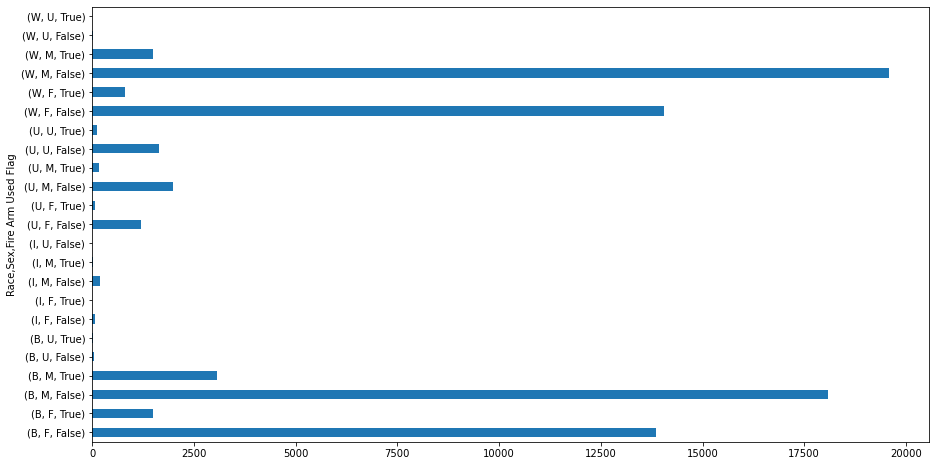

In [72]:
df_crime.groupby(['Race', 'Sex'])['Fire Arm Used Flag'].value_counts().plot(kind='barh', figsize=(15,8));

Text(0.5, 0, 'Number of Criminal Reports')

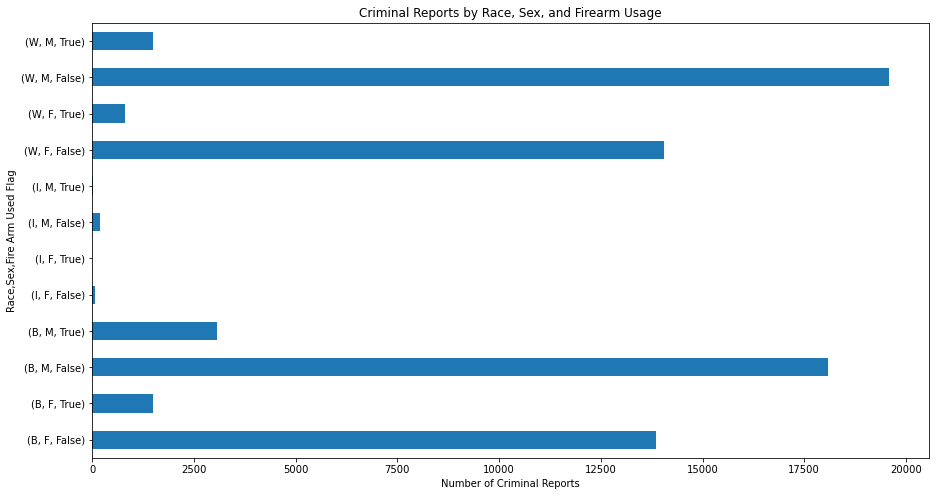

In [84]:
df_crime.loc[(df_crime['Race'] != 'U') & 
             (df_crime['Sex'] != 'U')].groupby(['Race', 'Sex'])['Fire Arm Used Flag'].value_counts().plot(kind='barh', 
                                                                                                          figsize=(15,8))
plt.title('Criminal Reports by Race, Sex, and Firearm Usage')
plt.xlabel('Number of Criminal Reports')

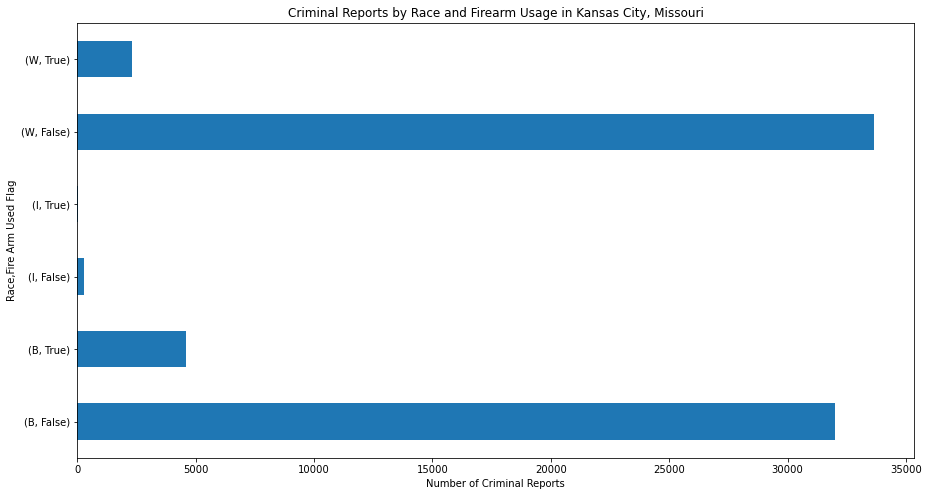

In [91]:
df_crime.loc[(df_crime['Race'] != 'U')].groupby(['Race'])['Fire Arm Used Flag'].value_counts().plot(kind='barh', 
                                                                                                          figsize=(15,8))
plt.title('Criminal Reports by Race and Firearm Usage in Kansas City, Missouri')
plt.xlabel('Number of Criminal Reports');